## 📌 01. 회귀 개념 알아보기

### 💡 회귀 분석?
- 데이터를 가장 잘 설명하는 모델을 찾아 입력값에 따른 미래 결과값을 예측하는 알고리즘
- 완벽한 예측은 불가능하기 때문에 최대한 잘 근사해야 함

## 📌 02. 단순 선형 회귀

### 💡 단순 선형 회귀?
- 데이터를 설명하는 모델을 **직선 형태**로 가정
        가정: Y = beta_0 + beta_1 * X
- 직선을 구성하는 beta_0(y절편)와 beta_1(기울기)를 구해야 함

### 💡 Loss 함수 이해하기
- 실제 값과 예측 값 차이의 제곱의 합을 Loss 함수로 정의 (부호 상쇄)
        👉 Loss 함수가 작을수록 좋은 모델!

### 💡 Loss 함수 줄이기
- Loss 함수에서 주어진 값은 입력 값과 실제 값
- beta_0(y절편), beta_1(기울기) 값을 조절하여 Loss 함수의 크기를 작게 함
- 어떻게 Loss 함수의 크기를 작게 하는 beta_0(y절편), beta_1(기울기) 찾지?
    1. Gradient descent (경사 하강법)
    2. Normal equation (least squares)
    3. Brute force search
    4. ...

### 🥸 경사 하강법(Gradient descent)
1. 랜덤 초기화
2. Loss 값 계산
3. Gradient 계산 (경사도)
4. beta_0, beta_1 업데이트

### 💡 단순 선형 회귀 과정 살펴보기
1. 데이터 전처리
2. 단순 선형 회귀 모델 학습 (경사 하강법)
3. 새로운 데이터에 대한 예측

### 💡 단순 선형 회귀 특징
- 가장 기초적이나 여전히 많이 사용되는 알고리즘
- 입력값이 **1개**인 경우에만 적용 가능
- 입력값과 결과값의 관계를 알아보는 데 용이
- 입력값이 결과값에 얼마나 영향을 미치는지 알 수 있음
- 두 변수 간의 관계를 직관적으로 해석하고자 하는 경우 활용

### 👩‍💻 예제

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

LinearRegression 모델의 입력값으로는 Pandas의 DataFrame의 feature (X) 데이터와 Series 형태의 label (Y) 데이터를 입력 받을 수 있음

In [6]:
# 1. X 형태 변환하여 train_X 에 저장
train_X = pd.DataFrame(X, columns = ['X'])

# 2. Y 형태 변환하여 train_Y 에 저장
train_Y = pd.Series(Y)

# 변환된 데이터를 출력합니다.
print('전 처리한 X 데이터: \n {}'.format(train_X))
print('전 처리한 X 데이터 shape: {}\n'.format(train_X.shape))

print('전 처리한 Y 데이터: \n {}'.format(train_Y))
print('전 처리한 Y 데이터 shape: {}'.format(train_Y.shape))

전 처리한 X 데이터: 
           X
0  8.701538
1  3.908258
2  1.893624
3  3.287300
4  7.393330
5  2.989846
6  2.257572
7  9.844507
8  9.945895
9  5.483216
전 처리한 X 데이터 shape: (10, 1)

전 처리한 Y 데이터: 
 0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64
전 처리한 Y 데이터 shape: (10,)


#### 모델 학습

In [7]:
# 1. 모델 초기화
lrmodel = LinearRegression()

# 2. train_X, train_Y 데이터를 학습
lrmodel.fit(train_X, train_Y)

LinearRegression()

#### Beta_0(y절편), Beta_1(기울기) 값 확인

In [10]:
beta_0 = lrmodel.intercept_
beta_1 = lrmodel.coef_[0]

print('beta_0(y절편) : ', beta_0)
print('beta_1(기울기): ', beta_1)

beta_0(y절편) :  2.5061811708934925
beta_1(기울기):  0.4307811787648283


#### 학습 결과 시각화

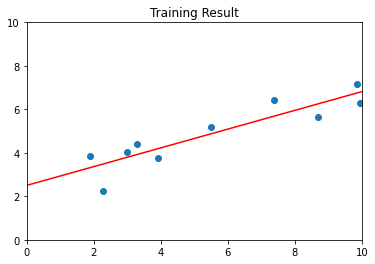

In [15]:
plt.scatter(X, Y)
plt.plot([0,10], [lrmodel.intercept_, 10 * lrmodel.coef_[0] + lrmodel.intercept_], c='r')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('Training Result')

plt.show()
plt.close()

#### 예측하기

In [16]:
# 1. train_X에 대해서 예측
pred_X = lrmodel.predict(train_X)

print('train_X에 대한 예측값 : \n{}\n'.format(pred_X))
print('실제값 : \n{}\n'.format(train_Y))

train_X에 대한 예측값 : 
[6.2546398  4.18978504 3.32191889 3.92228833 5.6910886  3.79415077
 3.47870087 6.74700964 6.7906856  4.86824749]

실제값 : 
0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64



## 📌 03. 다중 선형 회귀

### 💡 다중 선형 회귀 모델?
- 입력값 X가 여러 개(2개 이상)인 경우 활용할 수 있는 회귀 알고리즘
- 각 개별 Xi 에 해당하는 최적의 beta_i를 찾아야 함

### 💡 다중 선형 회귀 모델의 Loss 함수
- 단순 선형 회귀와 마찬가지로 Loss 함수는 입력값과 실제값 차이의 제곱의 합으로 정의
- 마찬가지로 beta_0, beta_1, ..., beta_M 값을 조절하여 Loss 함수의 크기를 작게 해야 함

### 💡 다중 선형 회귀 특징
- 여러 개의 입력값과 결과값 간의 관계 확인 가능
- 어떤 입력값이 결과값에 어떠한 영향을 미치는지 알 수 있음
- 여러 개의 입력값 사이 간의 **상관관계**가 높을 경우 결과에 대한 신뢰성을 잃을 가능성이 있음
    - 상관관계: 두가지 것의 한쪽이 변화하면 다른 한쪽도 따라서 변화하는 관계

### 👩‍💻 예제
#### 데이터 전처리

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/Advertising.csv')

# 입력 변수로 사용하지 않는 Unnamed: 0 변수 삭제
df = df.drop(columns = ['Unnamed: 0'])

print('원본 데이터 샘플 :')
display(df.head())

원본 데이터 샘플 :


,FB,TV,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [24]:
# 1. Sales 변수는 label 데이터로 Y에 저장하고 나머진 X에 저장
X = df.drop(columns = ['Sales'])
Y = df['Sales']

# 2. 2:8 비율로 (test_size = 0.2) X와 Y를 학습용과 평가용 데이터로 분리
train_X, test_X, train_Y, test_Y = train_test_split(X, Y,
                                                   test_size = .2,
                                                   random_state = 42)

# 전 처리한 데이터를 출력합니다
print('train_X : ')
display(train_X.head())
print('train_Y : ')
display(train_Y.head())

print('test_X : ')
display(test_X.head())
print('test_Y : ')
display(test_Y.head())

train_X : 


,FB,TV,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


train_Y : 


79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
Name: Sales, dtype: float64

test_X : 


,FB,TV,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


test_Y : 


95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

#### 학습하기

In [25]:
# 1.  다중 선형 회귀 모델을 초기화 하고 학습
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

# 2. 학습된 파라미터 값 확인
beta_0 = lrmodel.intercept_
beta_1 = lrmodel.coef_[0]
beta_2 = lrmodel.coef_[1]
beta_3 = lrmodel.coef_[2]

print('beta_0 : %f' % beta_0)
print('beta_1 : %f' % beta_1)
print('beta_2 : %f' % beta_2)
print('beta_3 : %f' % beta_3)

beta_0 : 2.979067
beta_1 : 0.044730
beta_2 : 0.189195
beta_3 : 0.002761


#### 예측하기

In [27]:
print('test_X : ')
test_X.head()

test_X : 


,FB,TV,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [30]:
# 1. test_X 에 대해서 예측
pred_Y = lrmodel.predict(test_X)
print('test_X에 대한 예측값 : \n{}\n'.format(pred_Y))

test_X에 대한 예측값 : 
[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]



In [33]:
import numpy as np

# 새로운 데이터 df1 정의
df1 = pd.DataFrame(np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 1]]), columns=['FB', 'TV', 'Newspaper'])
print('df1 : ')
df1

df1 : 


,FB,TV,Newspaper
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,1,1,1


In [34]:
# 2. df1에 대해서 예측해보기
pred_df1 = lrmodel.predict(df1)
print('df1에 대한 예측값 : \n{}\n'.format(pred_df1))

df1에 대한 예측값 : 
[2.97906734 3.02379686 3.16826239 2.98182845 3.21575302]



## 📌 04. 회귀 평가 지표
### 💡 회귀 알고리즘 평가
- 어떤 모델이 좋은 모델인지는 목표를 얼마나 잘 달성했는지 정도를 평가해야 알 수 있음
- 실제 값과 모델이 예측하는 값의 차이에 기반한 평가 방법
    - 예시: RSS, MSE, MAE, MAPE, R^2

### 👀 RSS - 단순 오차
1. 실제 값과 예측 값의 단순 오차 제곱의 합
2. 값이 작을수록 모델의 성능이 높음
3. 전체 데이터에 대한 실제 값과 예측하는 값의 오차 제곱의 총합

#### 😎 RSS 특징
- 가장 간단한 평가 방법으로 직관적인 해석이 가능
- 그러나 오차를 그대로 이용하기 때문에 입력 값의 **크기에 의존적**임
- 절대적인 값과 비교가 불가능

### 👀 MSE, MAE - 절대적인 크기에 의존한 지표
####  MSE(Mean Squared Error)
- **평균 제곱 오차**, RSS에서 데이터 수 만큼 나눈 값 (RSS * 1/N)
- 작을수록 모델의 성능이 높다고 평가할 수 있음

#### MAE(Mean Absolute Error)
- **평균 절대값 오차**, 실제 값과 예측 값의 오차의 절대값의 평균
- 작을수록 모델의 성능이 높다고 평가할 수 있음

#### 😎 MSE, MAE 특징
- MSE: 이상치(Outlier) 즉, 데이터들 중 크게 떨어진 값에 민감
- MAE: 변동성이 큰 지표와 낮은 지표를 같이 예측할 시 유용
- 가장 간단한 평가 방법들로 직관적인 해석이 가능
- 그러나 평균을 그대로 이용하기 때문에 입력 값의 크기에 의존적
- 절대적인 값과 비교가 불가능

### 👩‍💻 예제
####  회귀 알고리즘 평가 지표 - RSS

In [36]:
# train_X 의 예측값 계산
pred_train = lrmodel.predict(train_X)

# 1. train_X의 RSS 값 계산
RSS_train = np.sum((train_Y - pred_train) ** 2)
print('RSS_train : %f' % RSS_train)

RSS_train : 432.820708


In [37]:
# test_X 의 예측값 계산
pred_test = lrmodel.predict(test_X)

# 2. test_X의 RSS 계산
RSS_test = np.sum((test_Y - pred_test) ** 2)
print('RSS_test : %f' % RSS_test)

RSS_test : 126.963894


####  회귀 알고리즘 평가 지표 - MSE, MAE

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. train_X의 MSE, MAE 계산
MSE_train = mean_squared_error(train_Y, pred_train)
MAE_train = mean_absolute_error(train_Y, pred_train)

print('MSE_train : %f' % MSE_train)
print('MAE_train : %f' % MAE_train)

MSE_train : 2.705129
MAE_train : 1.198468


In [41]:
# 2. test_X의 MSE, MAE 계산
MSE_test = mean_squared_error(test_Y, pred_test)
MAE_test = mean_absolute_error(test_Y, pred_test)

print('MSE_test : %f' % MSE_test)
print('MAE_test : %f' % MAE_test)

MSE_test : 3.174097
MAE_test : 1.460757


### 👀 R2 (결정 계수)
- 회귀 모델의 **설명력**을 표현하는 지표
- **1에 가까울수록 높은 성능의 모델**이라고 해석할 수 있음
    R^2 = 1 - (RSS/TSS)
- TSS : 데이터 평균 값과 실제값 차이의 제곱

#### 😎 R2 특징
- 오차가 없을수록 1에 가까운 값을 찾음
- 값이 0인 경우, 데이터의 평균 값을 출력하는 직선 모델을 의미
- 음수 값이 나온 경우, 평균 값 예측보다 성능이 좋지 않음

### 👩‍💻 예제
####  회귀 알고리즘 평가 지표 - R2

In [43]:
from sklearn.metrics import r2_score

# 1. train_X의 R2 값 계산
R2_train = r2_score(train_Y, pred_train)
print('R2_train : %f' % R2_train)

R2_train : 0.895701


In [44]:
# 2. test_X의 R2 값 계산
R2_test = r2_score(test_Y, pred_test)
print('R2_test : %f' % R2_test)

R2_test : 0.899438
